# Esercitazione 2: Heart Disease - Soluzioni

**1 - \[\*\]** 
- Importare le librerie **numpy**, **pandas** e **matplotlib.pyplot** con i rispettivi alias: **np**, **pd** e **plt**.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2 - \[\*\]** 
- Caricare la tabella contenuta in *heart.csv*

In [97]:
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**3 - \[\*\]** 
- Valutare la quantità di dati mancanti

In [98]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**4 - \[\*\*\*\]**
- Le variabili categoriche del dataset non sono segnate come tali dato che hanno un valore numerico. Definire un vettore di feature categoriche, sapendo che le feature numeriche sono le seguenti: <br>

> numerical_features = \['age', 'trestbps', 'chol', 'thalach', 'oldpeak'\]

- Assegnare il tipo *category* alle colonne interessate. <br>

> Suggerimento: usare il metodo **.ASTYPE(new_type)** sul DataFrame. Restituisce un DF con colonne di tipo *new_type*.

In [99]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical_features = heart.drop(numerical_features, axis=1).columns.values
heart[categorical_features] = heart[categorical_feature].astype("category")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(1), int64(4)
memory usage: 15.8 KB


**5 - \[\*\]**
- Mostrare una descrizione riassuntiva delle colonne **categoriche**
- Siamo in presenza di dataset bilanciato su la colonna *target*?

In [100]:
heart[categorical_features].describe()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


**6 - \[\*\*\]** 
- Plottare una scatter matrix **per le sole feature numeriche**.<br>
- Individuare negli scatterplot le differenze di *target* tramite il colore dei punti.<br>

> Suggerimento: usare *pd.plotting.scatter_matrix(...)* specificando negli argomenti *figsize = (10,10)*

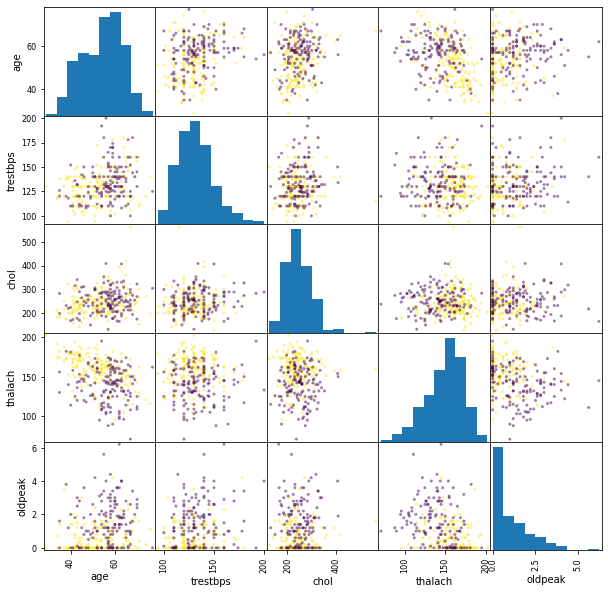

In [101]:
pd.plotting.scatter_matrix(heart[numerical_features], c = heart.target, figsize = (10,10) )
plt.show()

**7 - \[\*\*\*\]** 
- Per ogni feature categorica, osservare come le categorie separano i valori di target.<br>

>Suggerimento: usare **.groupby(\[...\])**

In [102]:
for i in categorical_features[:-1]:
    print(heart.groupby([i,"target"]).target.count())

sex  target
0    0          24
     1          72
1    0         114
     1          93
Name: target, dtype: int64
cp  target
0   0         104
    1          39
1   0           9
    1          41
2   0          18
    1          69
3   0           7
    1          16
Name: target, dtype: int64
fbs  target
0    0         116
     1         142
1    0          22
     1          23
Name: target, dtype: int64
restecg  target
0        0         79
         1         68
1        0         56
         1         96
2        0          3
         1          1
Name: target, dtype: int64
exang  target
0      0          62
       1         142
1      0          76
       1          23
Name: target, dtype: int64
slope  target
0      0          12
       1           9
1      0          91
       1          49
2      0          35
       1         107
Name: target, dtype: int64
ca  target
0   0          45
    1         130
1   0          44
    1          21
2   0          31
    1           7
3 

**8 - \[\*\]** 
- Le feature numeriche sono standardizzate?<br>

In [71]:
heart.describe()
# No.

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


**9 - \[\*\*\]** 
- Importare da *sklearn.preprocessing* la classe *StandardScaler*.<br>
- Inizializzare un modello *StandardScaler*. <br>
- Fittare il modello usando le sole colonne numeriche.<br>
- Trasformare le colonne numeriche con il modello fittato.<br>
- Osservare che le colonne interessate abbiano media 0 e deviazione standard pari a 1.

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(heart[numerical_features])
heart_stdNF = scaler.transform(heart[numerical_features]) 

**10 - \[\*\*\]** 
- Importare da *sklearn.manifold* la classe *Isomap*.<br>
- Inizializzare un modello *Isomap* con 3 componenti con un vicinato di 6 punti. <br>
- Fittare il modello usando il datest standardizzato (vedi punto precedente)<br>
- Trasformare il dataset standardizzato tramite il modello *Isomap* fittato.<br>

In [195]:
from sklearn.manifold import Isomap
nc = 3
isomap = Isomap(n_components = nc , n_neighbors = 6)
isomap.fit(heart_stdNF)
heart_iso = isomap.transform(heart_stdNF)

**11 - \[\*\*\]** 
- Creare un DataFrame *heart_iso* usando il dataset trasformato via Isomap. 
- I nomi delle feature dovranno essere ISO1, ISO2, ISO3.

In [197]:
Iso_labels = ["ISO"+str(i+1) for i in range(heart_iso.shape[1])]
heart_iso = pd.DataFrame(heart_iso, columns = Iso_labels)

**12 - \[\*\*\]** 
- Plottare una scatter matrix per il dataset.<br>
- Individuare negli scatterplot le differenze di *target* tramite il colore dei punti.<br>

> Suggerimento: usare *pd.plotting.scatter_matrix(...)* specificando negli argomenti *figsize = (10,10)*

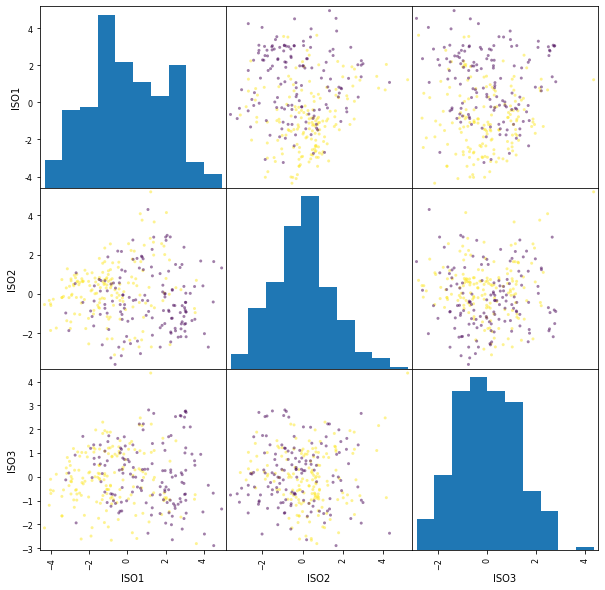

In [198]:
pd.plotting.scatter_matrix(heart_iso, c = heart.target, figsize = (10,10))
plt.show()

**13 - \[\*\*\]** 
- Dal dataset *heart* selezionare circa il 80% dei dati. Salvarli in un dataset *heart_train*

**Bonus! - \[\*\*\*\]** Dal dataset *heart* selezionare **casualmente** circa il 80% dei dati (con un margine massimo del 2%) e salvarlo in un dataset *heart_train*

- Salvare i dati rimanenti in un dataset *heart_test*
- Dal dataset *heart* estrapolare i dati di *target* corrispondenti alle righe selezionate per il dataset *heart_train* e salvarle in una serie *target_train*.
- Salvare i valori rimanenti di *target* in una serie *target_test*

In [132]:
error = 1
train_ratio = 0.8
while error > 0.02:
    sample = np.random.rand(heart.shape[0])
    error = np.abs((sample<= train_ratio).mean() - train_ratio)
print("Campionamento effettuato con margine", error) 
    
    
heart_train = heart.drop("target", axis = 1).loc[sample<=train_ratio,:]
target_train = heart.loc[sample<=train_ratio,"target"]

heart_test = heart.drop("target", axis = 1).loc[sample>train_ratio,:]
target_test = heart.loc[sample>train_ratio,"target"]

Campionamento effettuato con margine 0.015181518151815121


**14 - \[\*\*\]** 
- Dal modulo *sklearn.tree* importare la classe *DecisionTreeClassifier*
- Inizializzare un modello *DecisionTreeClassifier* inserendo tutti gli iperparametri richiesti, se necessario.
- Fittare il modello usando il metodo **.FIT(X_train, Y_train)**
- Valutare le performance del modello fittato usando il metodo **.SCORE(X_train, Y_train)**

L'output del metodo *.score*, è una statistica di nome *mean accuracy*. Ha valori compresi tra 0 e 1, ed è una media delle accuracy sulle varie categorie di *target* rappresenta la capacità del modello di classificare le osservazioni. <br>
In questo caso, rappresenta la percentuale di classificazione corretta del modello.

In [129]:
from sklearn.tree import DecisionTreeClassifier
DT1 = DecisionTreeClassifier(random_state = 0)
DT1.fit(heart_train, target_train)
DT1.score(heart_train, target_train)

1.0

**15 - \[\*\]**
- Valutare il modello sul test dataset <br>

> Suggerimento: usare il metodo *.score* del modello addestrato sul test dataset

In [130]:
DT1.score(heart_test, target_test)

0.7692307692307693

**16 - \[\*\*\]**
- Ci sono delle feature non utili al modello? <br>

> Suggerimento: usare l'attributo *.feature_importances_* del modello addestrato. Più è alto il peso, più importante è l'attributo

In [179]:
pd.DataFrame(DT1.feature_importances_.reshape((1,13)), columns = heart_train.columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.05336,0.035154,0.312968,0.05301,0.053212,0.040991,0.020916,0.10051,0.0,0.068603,0.046264,0.155129,0.059883
